In [1]:
from cmdstanpy import cmdstan_path, CmdStanModel
import pandas as pd
import arviz as az
import numpy as np
from matplotlib import pyplot as plt

# First name: Maciej (6)
# Last name: Wojtyś (6)

# Exercise 1 - generated quantities

In [2]:
stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_1.stan'
model = CmdStanModel(stan_file=stan_file)

data = {
    "N": 6
}
fit = model.sample(data = data)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [3]:
df = fit.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6]
0,0.0,0.0,86.58020,84.0,81.0,95.0,79.0,108.0,102.0
1,0.0,0.0,2.90004,1.0,4.0,4.0,2.0,3.0,3.0
2,0.0,0.0,59.98680,60.0,45.0,48.0,59.0,69.0,65.0
3,0.0,0.0,88.52130,106.0,81.0,83.0,95.0,79.0,84.0
4,0.0,0.0,36.82010,39.0,34.0,36.0,37.0,50.0,36.0
...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,172.91300,184.0,188.0,193.0,184.0,188.0,166.0
3996,0.0,0.0,31.57750,32.0,16.0,27.0,29.0,41.0,35.0
3997,0.0,0.0,165.27800,166.0,151.0,169.0,138.0,167.0,169.0
3998,0.0,0.0,114.37400,110.0,125.0,108.0,141.0,100.0,119.0


In [81]:
df.iloc[:, 2:9]

,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6]
0,1.07673,0.0,1.0,1.0,1.0,1.0,2.0
1,133.15200,121.0,138.0,147.0,136.0,128.0,138.0
2,106.99800,92.0,90.0,109.0,101.0,102.0,112.0
3,14.74710,16.0,15.0,19.0,11.0,20.0,13.0
4,192.05400,177.0,190.0,189.0,173.0,186.0,198.0
...,...,...,...,...,...,...,...
3995,40.57670,46.0,37.0,35.0,37.0,36.0,32.0
3996,50.54940,35.0,43.0,50.0,49.0,49.0,54.0
3997,274.69100,257.0,283.0,277.0,241.0,279.0,289.0
3998,192.17500,187.0,190.0,212.0,206.0,180.0,199.0


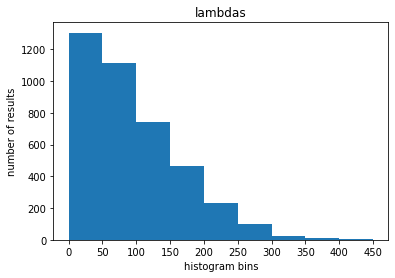

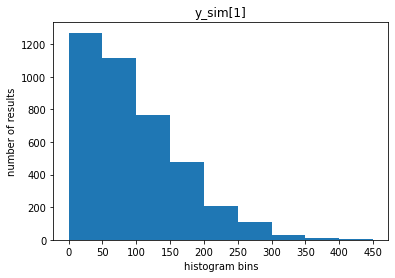

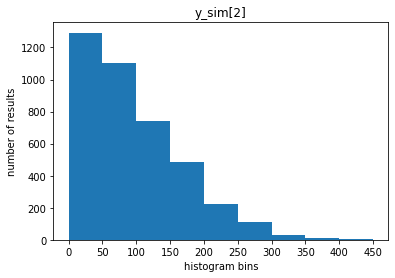

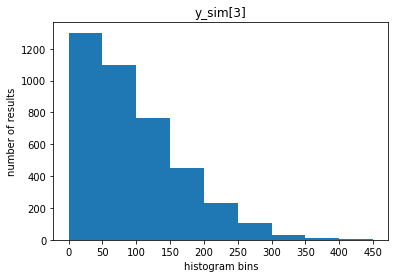

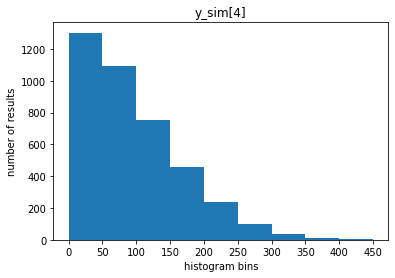

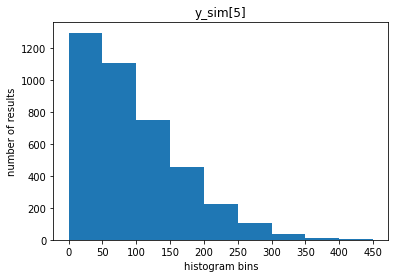

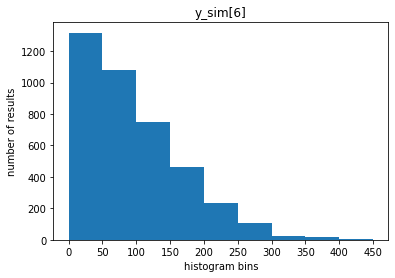

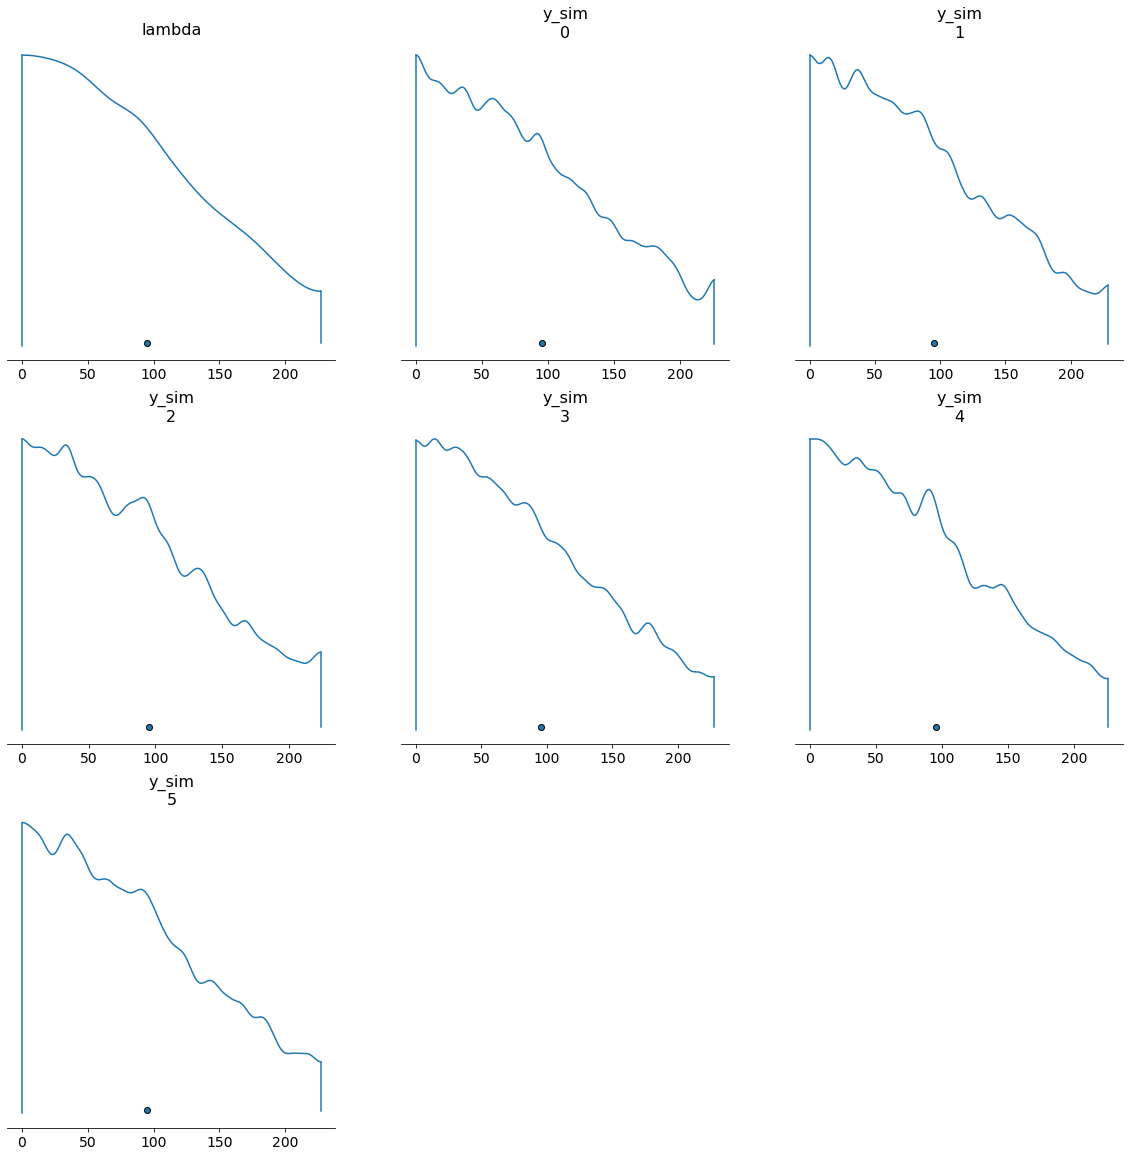

In [4]:
titles = ["lambdas", "y_sim[1]", "y_sim[2]", "y_sim[3]", "y_sim[4]", "y_sim[5]", "y_sim[6]"]
x = np.linspace(0, 450, 10)

for i in range(7):
    plt.figure(i)
    plt.hist(df.iloc[:, i + 2], bins = x)
    plt.title(titles[i])
    plt.xticks(x)
    plt.xlabel("histogram bins")
    plt.ylabel("number of results")
    plt.show()

az.plot_density(fit, figsize=(20, 20))
plt.show()


# Excercise 2 - constraints on the data

In [23]:
stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_2.stan'
model1 = CmdStanModel(stan_file=stan_file)

data = {
    "N": 12, 
    "y":[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
}
fit1 = model1.sample(data = data)
df1 = fit1.draws_pd()

stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_3.stan'
model2 = CmdStanModel(stan_file=stan_file)

data = {
    "N": 12, 
    "y":[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
}
fit2 = model2.sample(data = data)
df2 = fit2.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [127]:
df1

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,-10.06900,1.000000,0.95837,1.0,1.0,0.0,10.28140,0.387308
1,-10.40290,0.975959,0.95837,2.0,3.0,0.0,10.42820,0.345876
2,-9.95943,1.000000,0.95837,2.0,3.0,0.0,10.30540,0.405364
3,-9.91584,1.000000,0.95837,1.0,1.0,0.0,9.98896,0.413685
4,-10.21790,0.932907,0.95837,1.0,1.0,0.0,10.22440,0.366979
...,...,...,...,...,...,...,...,...
3995,-9.80266,1.000000,1.06310,1.0,1.0,0.0,9.85038,0.559133
3996,-11.63790,0.548987,1.06310,1.0,3.0,0.0,12.52910,0.254344
3997,-13.00450,0.762788,1.06310,1.0,1.0,0.0,13.18380,0.193435
3998,-13.00450,0.881186,1.06310,1.0,1.0,0.0,14.15360,0.193435


In [128]:
df2

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,-9.94974,0.923299,0.891164,1.0,3.0,0.0,10.55430,0.592855
1,-9.73095,0.936542,0.891164,2.0,3.0,0.0,10.51380,0.469042
2,-10.67330,0.825877,0.891164,1.0,3.0,0.0,10.89790,0.320202
3,-10.32180,1.000000,0.891164,1.0,1.0,0.0,10.65240,0.354679
4,-10.23980,1.000000,0.891164,1.0,1.0,0.0,10.39100,0.364278
...,...,...,...,...,...,...,...,...
3995,-9.70431,0.907495,1.061640,2.0,3.0,0.0,10.33230,0.503002
3996,-9.70431,0.409123,1.061640,1.0,3.0,0.0,12.12580,0.503002
3997,-10.17070,0.865682,1.061640,2.0,3.0,0.0,10.46730,0.373032
3998,-9.85711,1.000000,1.061640,1.0,1.0,0.0,10.08830,0.426470


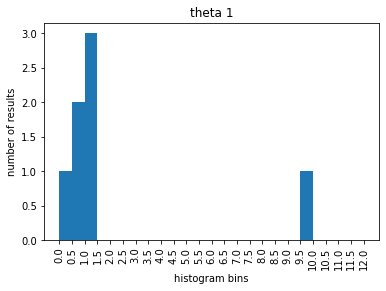

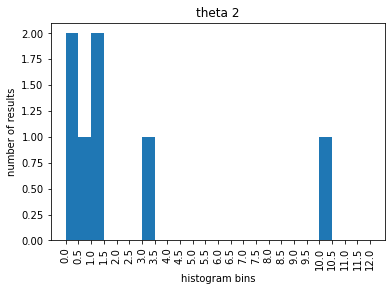

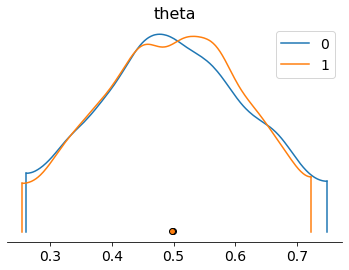

In [24]:
x = np.linspace(0, 12, 25)
plt.figure(1)
plt.hist(df1.iloc[7], bins = x)
plt.title("theta 1")
plt.xticks(x, rotation = 90)
plt.xlabel("histogram bins")
plt.ylabel("number of results")
plt.show()

plt.figure(1)
plt.hist(df2.iloc[7], bins = x)
plt.title("theta 2")
plt.xticks(x, rotation = 90)
plt.xlabel("histogram bins")
plt.ylabel("number of results")
plt.show()

az.plot_density([fit1, fit2])
plt.show()

# Excercise 3 - constraints on the parameters

In [17]:
stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_4.stan'
model1 = CmdStanModel(stan_file=stan_file)

data = {
    "N": 12, 
}
fit1 = model1.sample(data = data)
df1 = fit1.draws_pd()

stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_5.stan'
model2 = CmdStanModel(stan_file=stan_file)

data = {
    "N": 12, 
}
fit2 = model2.sample(data = data)
df2 = fit2.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [115]:
df1

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,-1.279070,0.999885,0.231379,2.0,5.0,0.0,1.774320,1.028960
1,-1.682220,0.998758,0.231379,4.0,15.0,0.0,2.232280,1.415230
2,-0.704506,0.999531,0.231379,3.0,11.0,0.0,2.254030,0.097004
3,-0.692466,1.000000,0.231379,1.0,1.0,0.0,0.705116,0.107015
4,-0.684399,1.000000,0.231379,1.0,1.0,0.0,0.693225,0.115062
...,...,...,...,...,...,...,...,...
3995,-0.917728,0.999932,0.120318,2.0,7.0,0.0,1.108600,0.647146
3996,-0.908264,0.999993,0.120318,2.0,3.0,0.0,0.924541,0.636146
3997,-0.691736,0.854746,0.120318,3.0,11.0,0.0,1.020540,0.334165
3998,-0.986068,0.831844,0.120318,2.0,6.0,1.0,1.477790,0.724361


In [116]:
df2

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,-1.26390,0.993419,0.635098,1.0,3.0,0.0,1.34580,1.156620
1,-1.26088,0.995253,0.635098,3.0,7.0,0.0,1.30007,1.137770
2,-1.25229,0.968319,0.635098,2.0,3.0,0.0,1.53697,0.940730
3,-1.25213,0.963477,0.635098,2.0,3.0,0.0,1.68508,1.059470
4,-1.70827,0.947225,0.635098,2.0,3.0,0.0,2.06923,2.116280
...,...,...,...,...,...,...,...,...
3995,-1.40137,0.984095,0.620534,2.0,7.0,0.0,1.44162,0.585064
3996,-1.25325,1.000000,0.620534,2.0,3.0,0.0,1.38092,0.929645
3997,-1.73857,0.897843,0.620534,2.0,3.0,0.0,2.88353,2.161800
3998,-1.36407,1.000000,0.620534,2.0,3.0,0.0,1.63323,1.490100


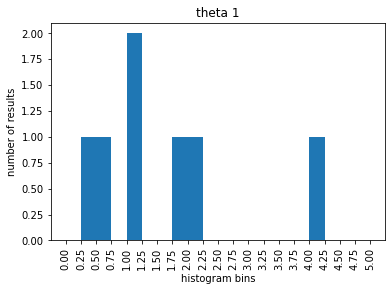

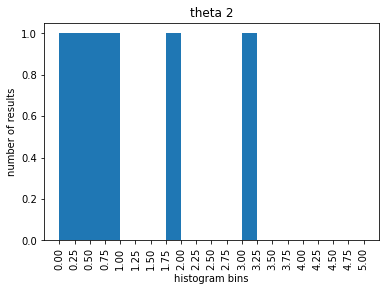

array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

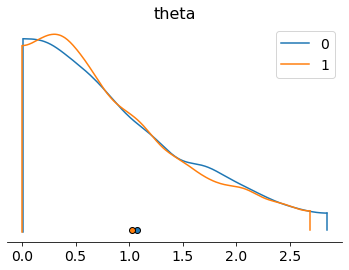

In [18]:
x = np.linspace(0, 5, 21)
plt.figure(1)
plt.hist(df1.iloc[7], bins = x)
plt.title("theta 1")
plt.xticks(x, rotation = 90)
plt.xlabel("histogram bins")
plt.ylabel("number of results")
plt.show()

plt.figure(2)
plt.hist(df2.iloc[7], bins = x)
plt.title("theta 2")
plt.xticks(x, rotation = 90)
plt.xlabel("histogram bins")
plt.ylabel("number of results")
plt.show()

az.plot_density([fit1, fit2])


# Excercise 4 - functions and different functionalities of stan

In [152]:
stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_6.stan'
model = CmdStanModel(stan_file=stan_file)

data = {
    "y_guess": [2],
    "theta": [6]
}

fit = model.sample(data = data, iter_sampling = 1, chains = 1)
fit.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.32935


# Excercise 5 - different methods of defining models

In [5]:
data = {
    "N": 6
}

stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_7.stan'
model1 = CmdStanModel(stan_file=stan_file)

fit1 = model1.sample(data = data)

stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_8.stan'
model2 = CmdStanModel(stan_file=stan_file)

fit2 = model2.sample(data = data)

stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_9.stan'
model3 = CmdStanModel(stan_file=stan_file)

fit3 = model3.sample(data = data)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [6]:
fit1.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,y[1],y[2],y[3],y[4],y[5],y[6],theta
0,-3.889220,0.942482,0.362484,3.0,7.0,0.0,9.55863,-0.521278,-0.678522,-0.298432,-0.917826,-1.501880,1.940060,-0.588269
1,-3.761680,0.896310,0.362484,3.0,7.0,0.0,7.26029,0.275036,0.559347,0.624619,1.138750,2.281020,-0.577359,1.218610
2,-2.930390,0.978143,0.362484,3.0,7.0,0.0,8.23152,0.908198,0.567985,0.644362,0.012633,-1.158530,1.702130,0.775574
3,-7.648630,0.863345,0.362484,3.0,7.0,0.0,10.70330,0.789379,-1.014240,-0.134179,3.483070,0.799523,-1.222340,0.626319
4,-4.510960,0.989877,0.362484,3.0,7.0,0.0,8.63926,-0.481629,0.734284,0.403716,-2.340270,-0.755287,1.124520,-0.570064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-2.416690,0.901809,0.350879,3.0,15.0,0.0,7.16704,-0.028630,-0.751556,-1.788130,-0.514215,-0.577571,0.978425,-0.104752
3996,-0.707018,0.997314,0.350879,2.0,7.0,0.0,2.71675,-0.440737,-0.365902,-0.847343,-0.713926,-0.132993,0.221784,-0.601632
3997,-1.153440,0.986245,0.350879,3.0,15.0,0.0,2.71574,0.892357,0.949317,1.714420,1.381730,0.931085,0.337536,0.685582
3998,-0.946055,0.849562,0.350879,3.0,15.0,0.0,5.33299,-0.246135,-0.123748,-1.436580,-0.483756,-0.401048,0.072933,-0.156381


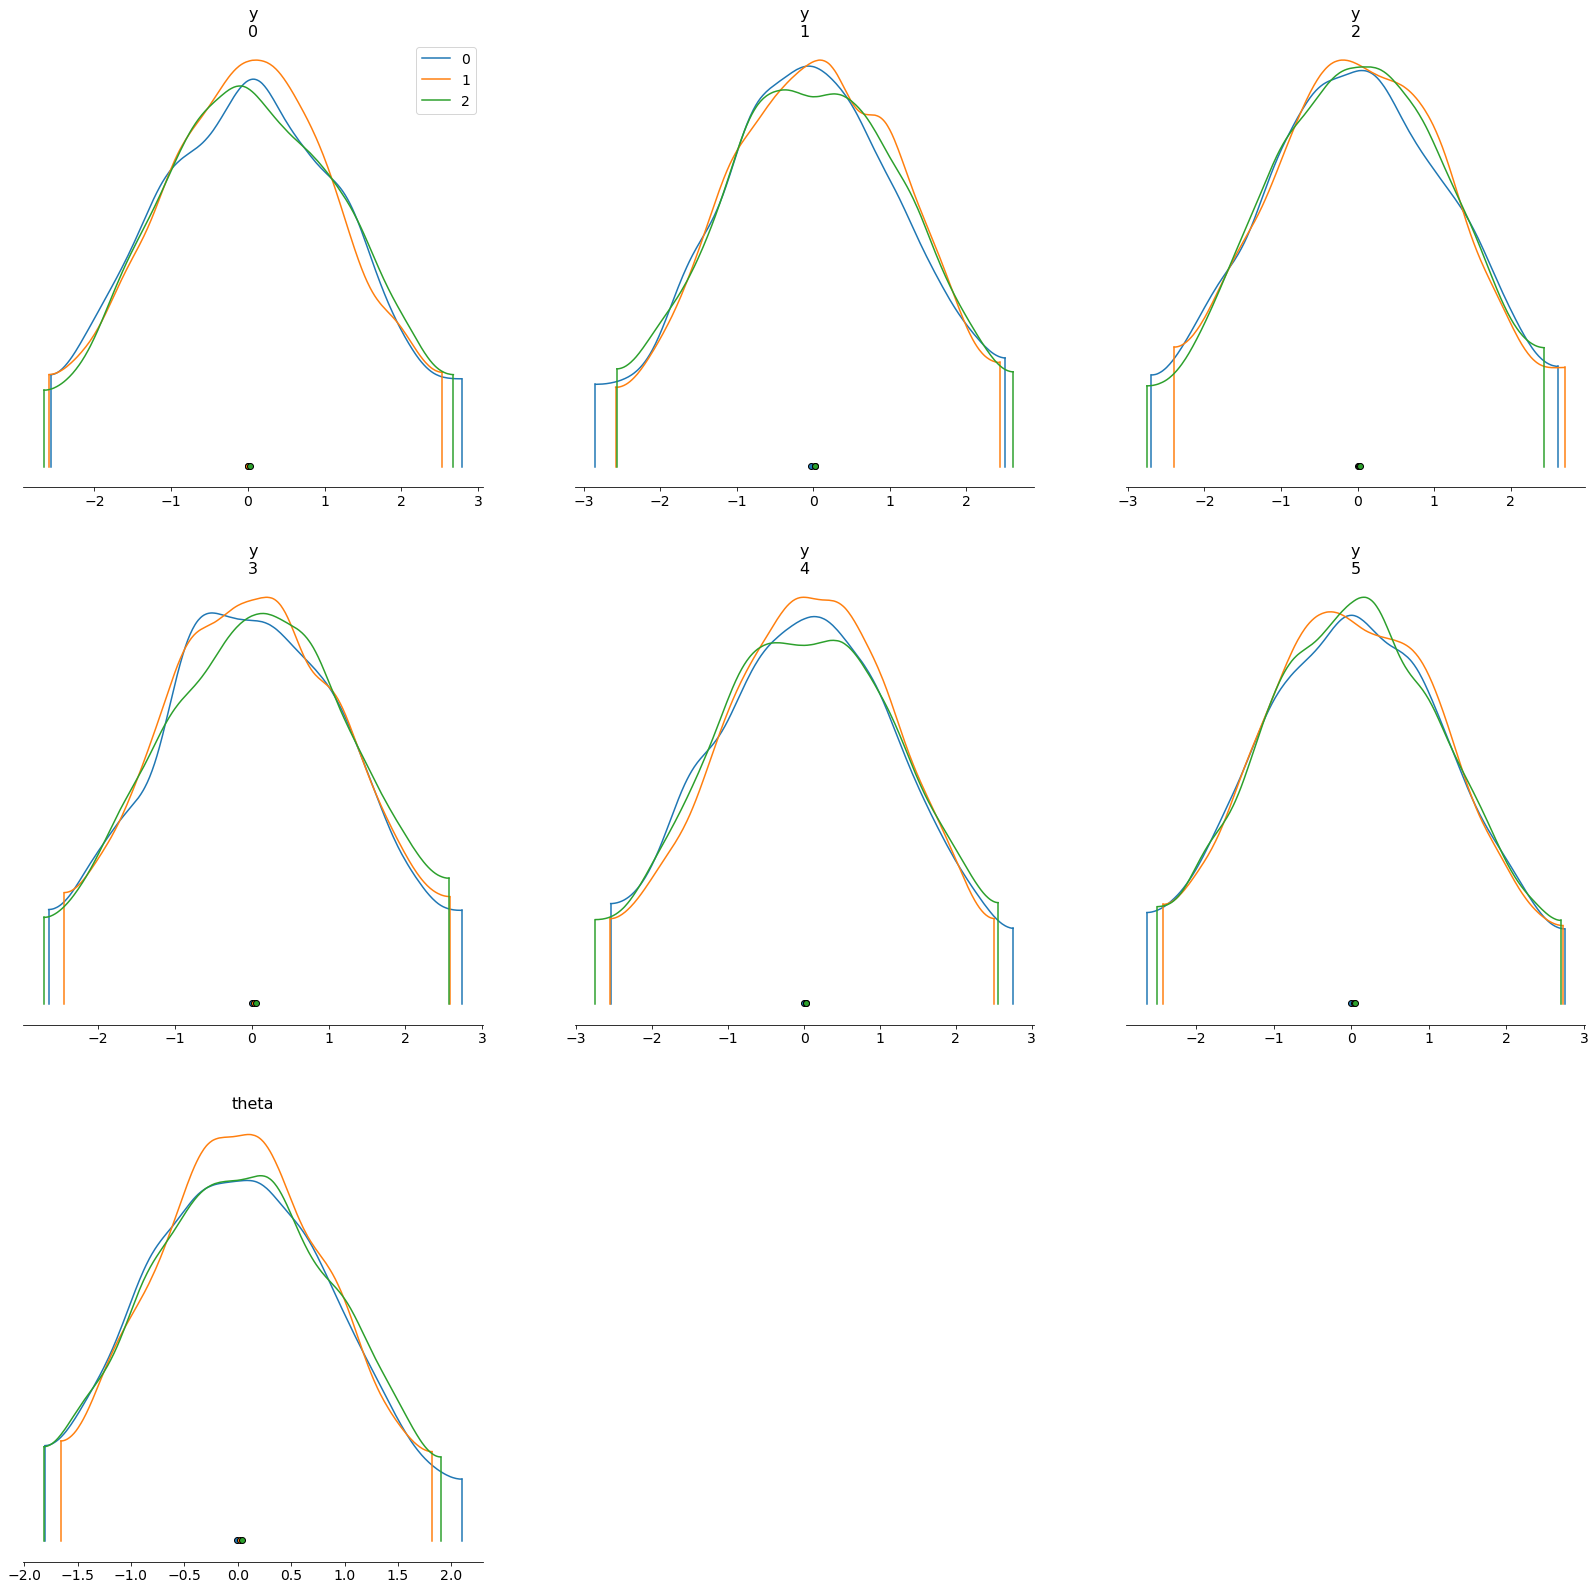

In [7]:
az.plot_density([fit1, fit2, fit3], figsize = (28, 28))
plt.show()

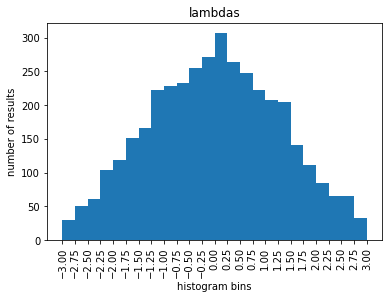

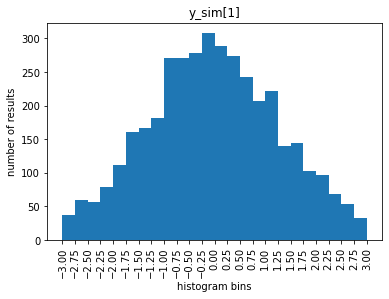

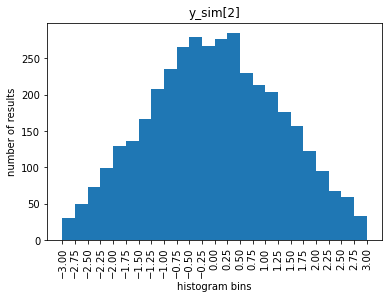

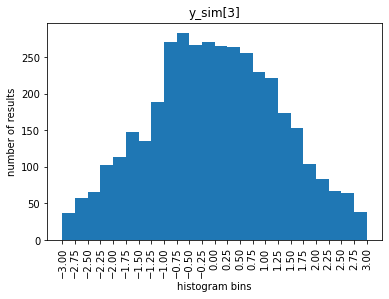

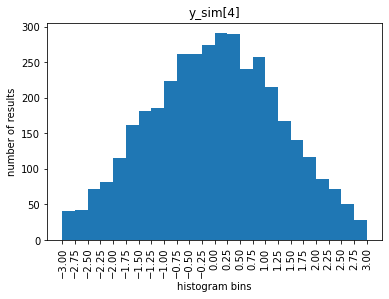

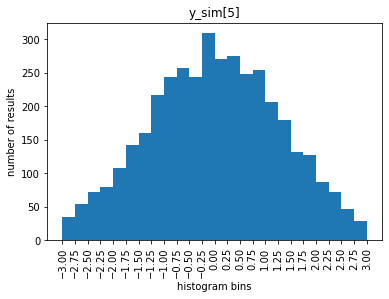

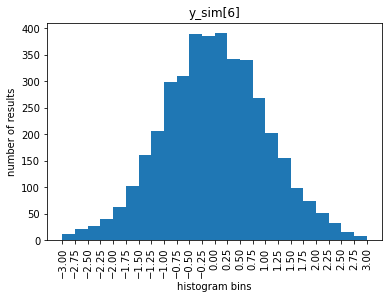

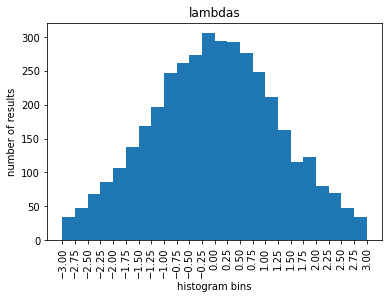

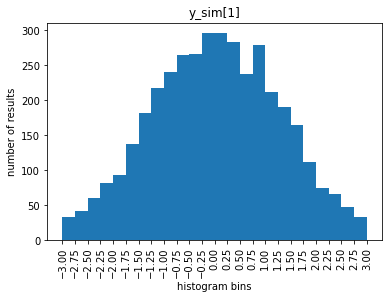

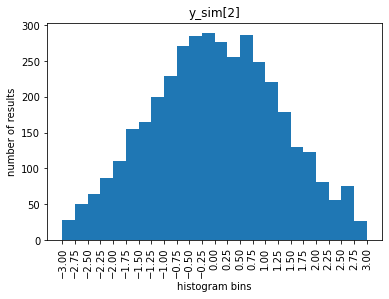

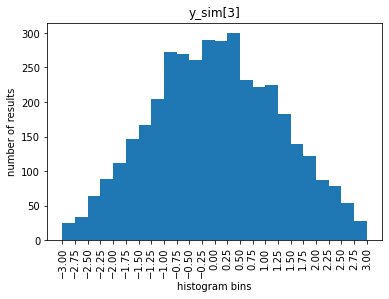

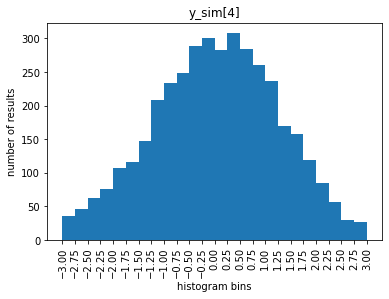

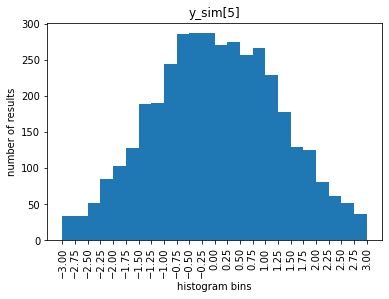

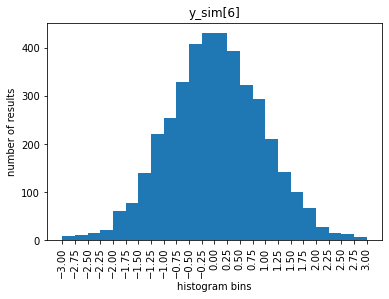

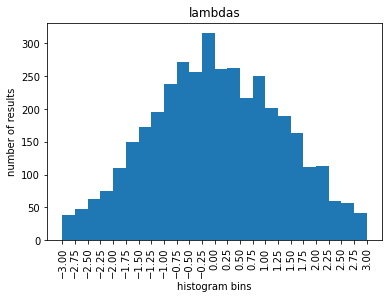

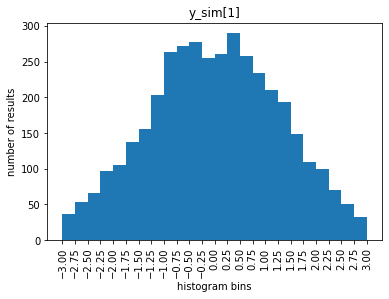

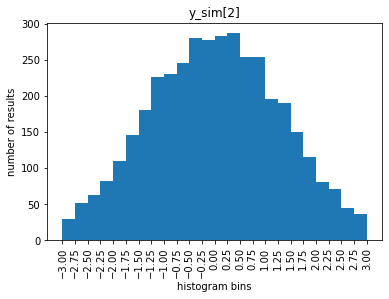

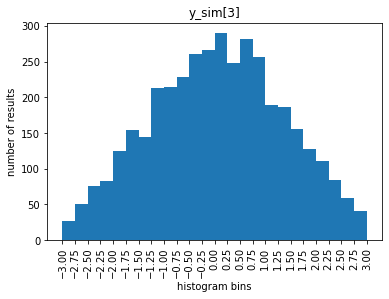

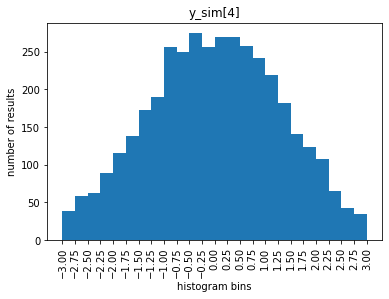

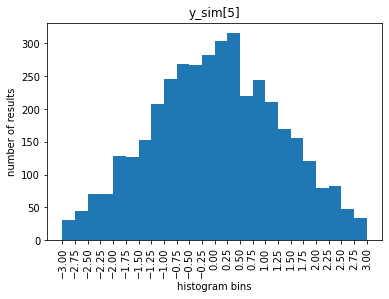

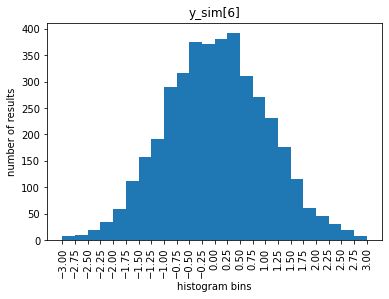

In [8]:
titles = ["lambdas", "y_sim[1]", "y_sim[2]", "y_sim[3]", "y_sim[4]", "y_sim[5]", "y_sim[6]", "y_sim[7]", "y_sim[8]", "y_sim[9]", "y_sim[10]", "y_sim[11]", "y_sim[12]"]
fits = [fit1, fit2, fit3]
x = np.linspace(-3, 3, 25)
for j in range(3):
    df = fits[j].draws_pd()

    for i in range(7):
        plt.figure(i)
        plt.hist(df.iloc[:, i + 7], bins = x)
        plt.title(titles[i])
        plt.xticks(x, rotation = 90)
        plt.xlabel("histogram bins")
        plt.ylabel("number of results")
        plt.show()

# Excercise 6 - generated quantities post sampling

In [9]:
stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_10.stan'
model = CmdStanModel(stan_file=stan_file)
data = {
    "N": 6
}
fit4 = model.generate_quantities(data = data, mcmc_sample = fit3)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing


In [10]:
df = fit4.draws_pd()
df

,mean_y
0,-1.972690
1,-1.282940
2,-0.923829
3,-0.710718
4,-0.708394
...,...
3995,-1.900040
3996,-1.381750
3997,-0.622025
3998,-0.742372


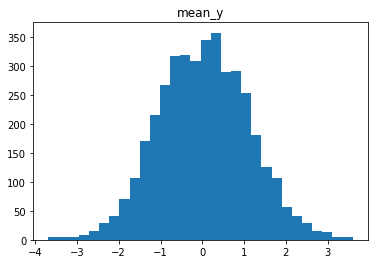

In [11]:
plt.hist(df.iloc[:, 0], bins = 30)
plt.title("mean_y")
plt.show()